# HR Diagram of Near By Stars

In [25]:
#importing libraries
import numpy as np
import astroquery.gaia as Gaia
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
#making the graphs look pretty
import seaborn as sns
sns.set_theme()

In [27]:
#reading csv files using pandas

#df = pd.read_csv('data.csv')

### columns I want: 

phot_g_mean_flux : _G-band mean flux (double, Flux[e-/s]) Mean flux in the G-band._

phot_g_mean_mag : _G-band mean magnitude (float, Magnitude[mag])Mean magnitude in the G band. This is computed from the G-band mean flux applying the magnitude zero-point in the Vega scale._ (this is apparent)


# Plan:

I want to plot the perceived magnitude in the G band on the y axis, with the difference of the near ultraviolet and infrared bands as the x axis. this seems the most simple way to go. 

I am going to try downloading the data as a csv file and then using the data science library as that is what i am learning to use in data 8 and that seems the most efficient 


In [28]:
#importing data sets (this data set was a small subset below if the whole set)
pd.options.display.max_rows = 10

#data 1 is just the simple data that will be plotted to see if this is working
data1 = pd.read_csv('gaia_hr1.csv')

In [29]:
print(data1)

                source_id          ra        dec   parallax        pmra  \
0     1964476435852285184  321.735456  38.801855  14.072027  107.990490   
1     1964476431552960384  321.734846  38.802808  14.237829  104.959220   
2     1964512169975479296  320.937184  38.806020  10.154621   55.609960   
3     1964898236001726080  320.330203  38.757388  13.506319   64.893074   
4     1964527838022391296  321.356407  39.019354  12.526404  100.921200   
...                   ...         ...        ...        ...         ...   
1995  2163525630050181248  315.051441  45.962830  11.026990  -48.877266   
1996  2163629087223452544  315.350136  46.273196  17.138117   64.543540   
1997  2163551567332434304  315.154944  46.382045  10.010221  -19.784494   
1998  2163656364539120000  315.485221  46.670537  10.963098   -5.528253   
1999  2163664958791872384  315.745429  46.715586  11.304558  -29.882153   

           pmdec  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
0     -15.926827        16

In [30]:
#turning the columns into arrays to mess with: 
#use array = df['Courses'].to_numpy()

gmag = data1['phot_g_mean_mag'].to_numpy()
bpmag = data1['phot_bp_mean_mag'].to_numpy()
rpmag = data1['phot_rp_mean_mag'].to_numpy()

In [31]:
diff_mag = (bpmag - rpmag)

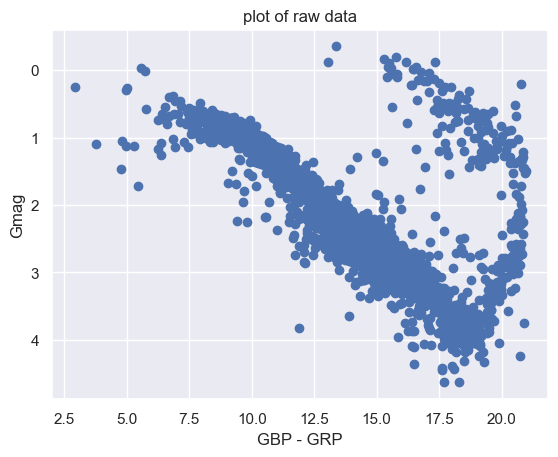

In [32]:
#plotting the first diagram:
plt.scatter(gmag,diff_mag)
plt.gca().invert_yaxis()
plt.title('plot of raw data')
#plt.gca().invert_xaxis()
plt.xlabel('GBP - GRP')
plt.ylabel('Gmag')
plt.show()


it is clear that the above plot is messy and doesnt fully resemble that of a star cluster's HR diagram, so i am going to minimize some of the noise by plotting the proper motion of the data set and removing distant stars (although there shouldn't be much if these stars are legit like it said)

In [33]:
pmra = data1['pmra'].to_numpy()
pmdec = data1['pmdec'].to_numpy()

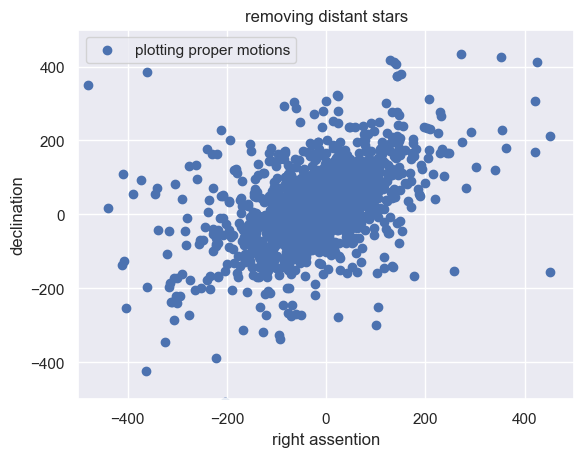

In [34]:
plt.scatter(pmdec,pmra, label = 'plotting proper motions')
plt.xlabel('right assention')
plt.ylabel('declination')
plt.title('removing distant stars')
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.show()

In [35]:
#there shouldn't be any distant stars  

In [36]:
#plotting the large data set: 

data2 = pd.read_csv('1676317087153O-result.csv')

print(data2)

                  source_id          ra        dec   parallax  \
0       1964476435852285184  321.735456  38.801855  14.072027   
1       1964476431552960384  321.734846  38.802808  14.237829   
2       1964512169975479296  320.937184  38.806020  10.154621   
3       1964898236001726080  320.330203  38.757388  13.506319   
4       1964527838022391296  321.356407  39.019354  12.526404   
...                     ...         ...        ...        ...   
331307  5047766932892879872   45.204368 -35.866896   9.916632   
331308  5047781677516431232   45.325438 -35.681581  13.366490   
331309  5047777966664680960   45.451884 -35.592638  10.066502   
331310  5050790559805357184   45.021639 -35.516560  10.921551   
331311  5050801005165813120   45.109057 -35.326455  11.093124   

        phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  
0             16.764603         17.940834         15.217005  
1             18.727798         19.583742         16.809708  
2             18.664164         2

In [37]:
y = data2['phot_g_mean_mag'].to_numpy()
x1 = data2['phot_bp_mean_mag'].to_numpy()
x2 = data2['phot_rp_mean_mag'].to_numpy()
x = x1 - x2


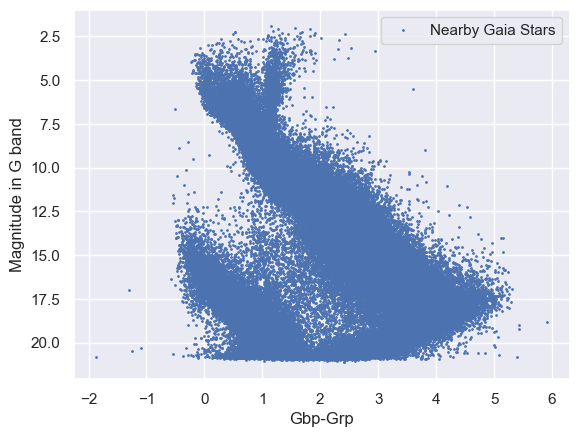

In [38]:
#plotting
plt.scatter(x,y, label = 'Nearby Gaia Stars', s = 1)
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Gbp-Grp')
plt.ylabel('Magnitude in G band')
plt.show()

In [39]:
#things to consider: making sure the magnitudes are absolute (which they probably arent)

def get_abs(mag,par):
    d = 1000/par #parsec in is mas, so 10^3 to get it back to as
    return mag - 5*np.log10(d/10) #returns absolute magnitude 


In [40]:
par = data2['parallax'].to_numpy()

gMag = get_abs(y,par)

C:\Users\alica\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


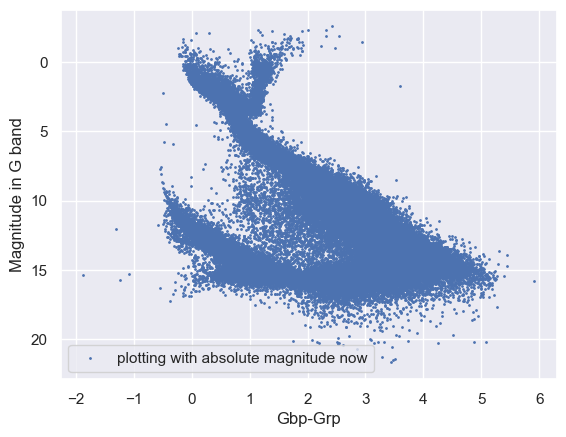

In [41]:
plt.scatter(x,gMag, label = 'plotting with absolute magnitude now', s = 1)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('Gbp-Grp')
plt.ylabel('Magnitude in G band')
plt.show()

## okay so far so good, so now its time to do some limiting tests! 

_here are some things im thinking of_

1. lets limit the quality of data through the parallax -- the closer the stars the more accurate. lets do that one first:

In [42]:
print('smallest parallax angle:',min(par), 'max parallax angle (MAS):',max(par))
print('average parallax angle(mas):',np.mean(par))

smallest parallax angle: 8.000061 max parallax angle (MAS): 768.0665
average parallax angle(mas): 14.671292225387246


In [43]:
#let's cut it at 30 yeah?

#par is the parallax array from data2
arr = [] #initial list for parallax
Mag = []
bands = []
#par_red1 = arr.to_numpy()
for i in range(0,len(par)):
    if par[i]>30:
        arr.append(par[i])
        Mag.append(gMag[i])
        bands.append(x[i])
        

In [44]:
par_red1 = np.array(arr)
gMag1 = np.array(Mag)
bands1 = np.array(bands)

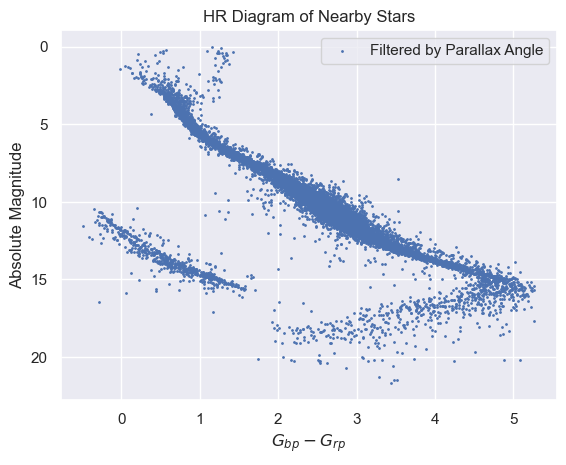

In [45]:
plt.scatter(bands1, gMag1, label = 'Filtered by Parallax Angle', s = 1)
plt.gca().invert_yaxis()
plt.title('HR Diagram of Nearby Stars')
plt.xlabel('$G_{bp}-G_{rp}$')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

In [46]:
len(bands1)

11867

## plotting by far distances now:



In [47]:
#par is the parallax array from data2
arr_far = [] #initial list for parallax
Mag_far = []
bands_far = []
#par_red1 = arr.to_numpy()
for i in range(0,len(par)):
    if par[i]<10:
        arr_far.append(par[i])
        Mag_far.append(gMag[i])
        bands_far.append(x[i])

In [48]:
par_red2 = np.array(arr_far)
gMag2 = np.array(Mag_far)
bands2 = np.array(bands_far)

len(par_red2)

29115

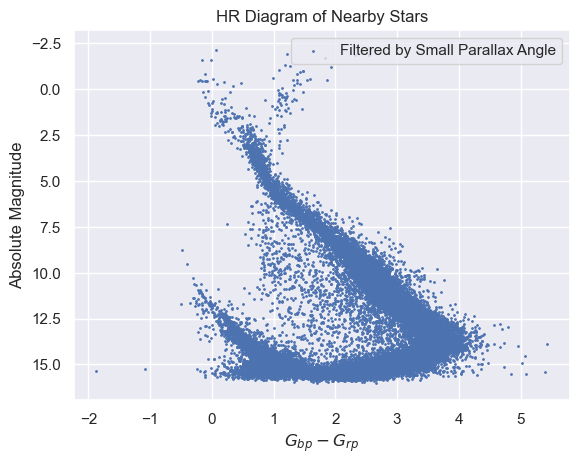

In [49]:
plt.scatter(bands2, gMag2, label = 'Filtered by Small Parallax Angle', s=1)
plt.gca().invert_yaxis()
plt.title('HR Diagram of Nearby Stars')
plt.xlabel('$G_{bp}-G_{rp}$')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

With small paralax angles, this is giving us the most distant stars in the available data set. This shows there are a lot more of those "filler stars" that were mentioned in Wednesday's meeting. 

## plotting by density: 

_possibly helpful stack overflow example_

<https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib>

gaussian_kde documentation:

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html>

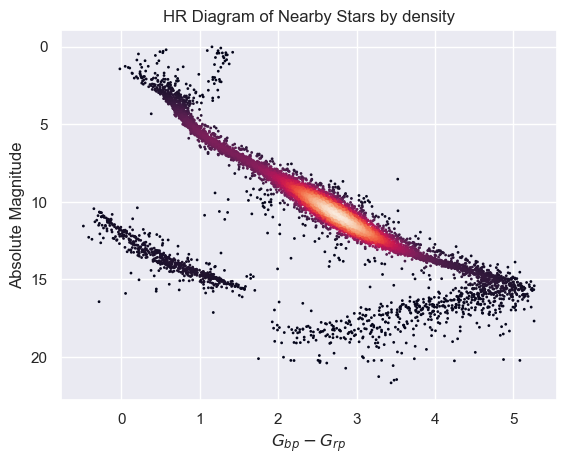

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

p = bands1
r = gMag1

# Calculate the point density
pr = np.nan_to_num(np.vstack([p,r]))

q = gaussian_kde(pr)(pr)

# fig, ax = plt.subplots()
plt.scatter(p, r, c=q, s=1)
plt.gca().invert_yaxis()
plt.title('HR Diagram of Nearby Stars by density')
plt.xlabel('$G_{bp}-G_{rp}$')
plt.ylabel('Absolute Magnitude')
#plt.colorbar(q)
plt.show()

### Notes: 

This doesnt work with the full data set (it takes too long to where the notebook just stops working completely). This is probably due to an inefficiency in the stats methods being used. I went ahead and just used the dat set that was made from the first set of data points. 

## Last Plot: Filter By Parallax Error  

In [51]:
data4 = pd.read_csv('1676953156049O-result.csv')
print(data4)

                  source_id          ra        dec   parallax  parallax_error  \
0       1964476435852285184  321.735456  38.801855  14.072027        0.075078   
1       1964476431552960384  321.734846  38.802808  14.237829        0.202138   
2       1964512169975479296  320.937184  38.806020  10.154621        0.161834   
3       1964898236001726080  320.330203  38.757388  13.506319        0.071914   
4       1964527838022391296  321.356407  39.019354  12.526404        0.035193   
...                     ...         ...        ...        ...             ...   
331307  5047766932892879872   45.204368 -35.866896   9.916632        0.155012   
331308  5047781677516431232   45.325438 -35.681581  13.366490        0.017031   
331309  5047777966664680960   45.451884 -35.592638  10.066502        0.043104   
331310  5050790559805357184   45.021639 -35.516560  10.921551        0.043675   
331311  5050801005165813120   45.109057 -35.326455  11.093124        0.023008   

        phot_g_mean_mag  ph

In [52]:
#gmag4 = data4['phot_g_mean_mag'].to_numpy()
colordif4 = data4['phot_bp_mean_mag'].to_numpy() - data4['phot_rp_mean_mag'].to_numpy()


x4 = [] #color difference for this data set
y4 = [] #apparent magnitude for this data set
lim4 = data4['parallax_error'].to_numpy() #limiting factor for this data set 

#limiting the data set via for loop:

for i in range(len(lim4)):
    if lim4[i]<0.1:
        x4.append(x[i])
        y4.append(gMag[i])

In [53]:
#len(gMag)

In [54]:
#finding limits of lim:

print('maximum error: ',max(lim4))
print('minimum error ', min(lim4))
print('mean erorr: ', np.mean(lim4))
print('let the error parameter be around 0.15 mas')

maximum error:  4.233253
minimum error  0.007861085
mean erorr:  0.1386970481412913
let the error parameter be around 0.15 mas


In [55]:
x4 = np.array(x4)
y4 = np.array(y4)

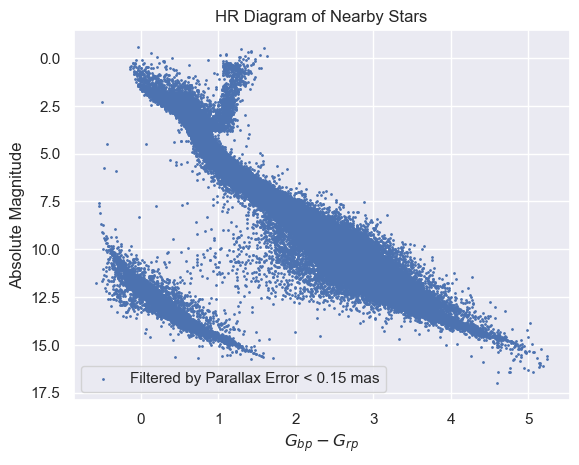

In [56]:
#plotting:
plt.scatter(x4,y4, label = 'Filtered by Parallax Error < 0.15 mas', s=1)
plt.gca().invert_yaxis()
plt.title('HR Diagram of Nearby Stars')
plt.xlabel('$G_{bp}-G_{rp}$')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.show()

## Combining all sets into one figure: 

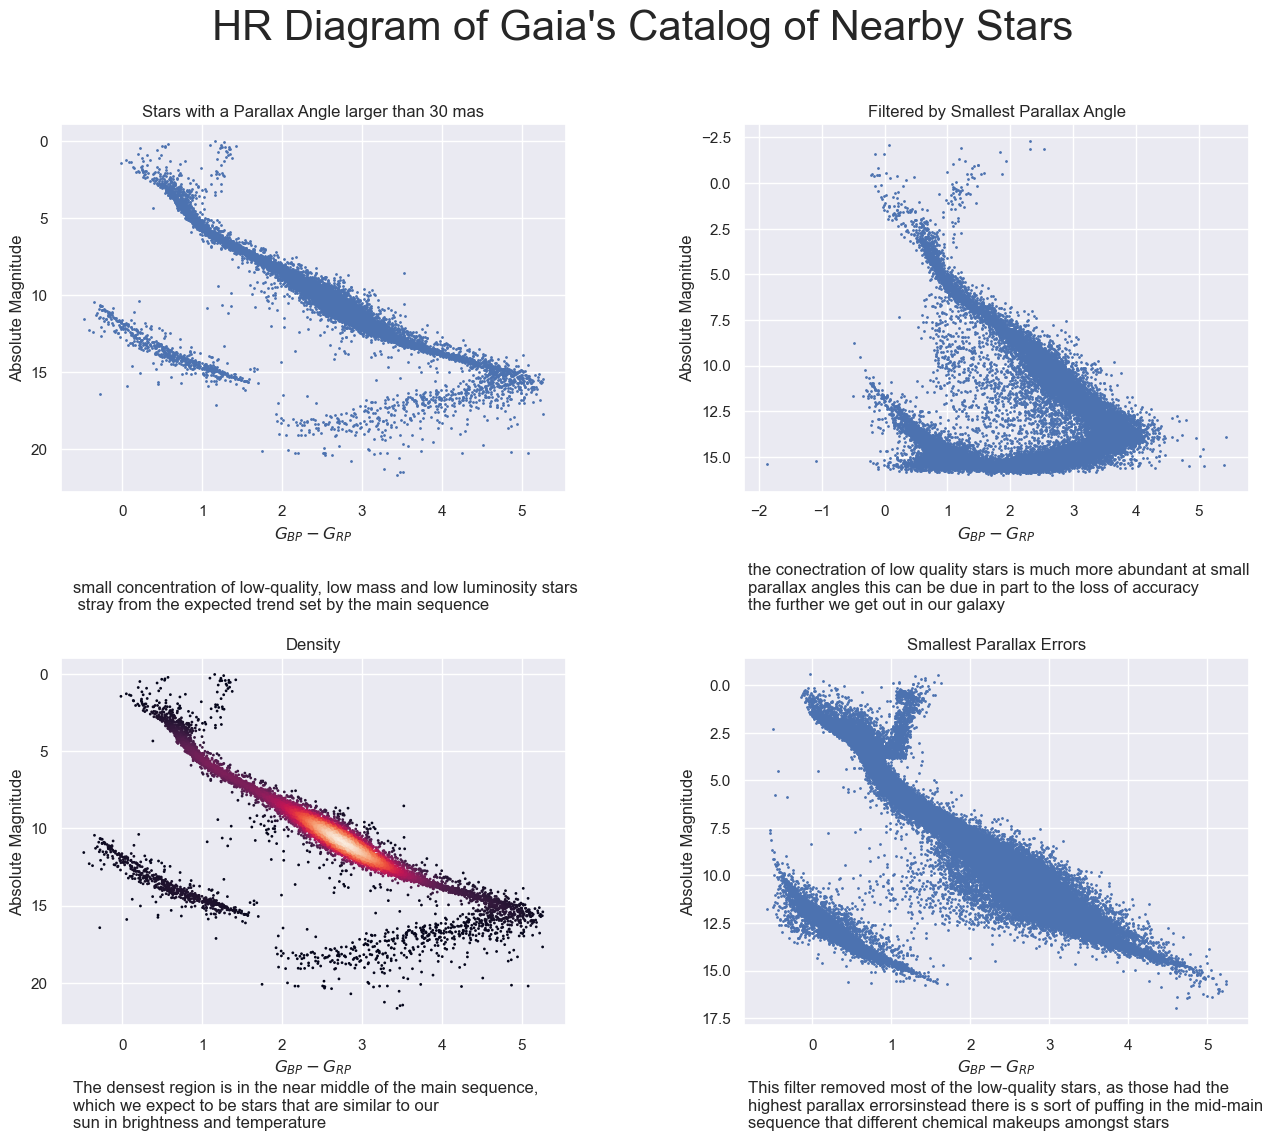

In [68]:
#defining figure: 
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

fig.tight_layout(pad=8.0)
fig.suptitle("HR Diagram of Gaia's Catalog of Nearby Stars", fontsize = 30)

#ax1: Nearby Stars 

ax1.scatter(bands1, gMag1, s = 1)
ax1.set_xlabel('$G_{BP}-G_{RP}$')
ax1.set_ylabel('Absolute Magnitude')
ax1.invert_yaxis()

ax1.title.set_text('Stars with a Parallax Angle larger than 30 mas')
t1 = (
    'small concentration of low-quality, low mass and low luminosity stars' +
    '\n stray from the expected trend set by the main sequence'
)
plt.figtext(0.12, 0.48, t1, wrap=False)


#ax2: Furthest stars 

ax2.title.set_text('Filtered by Smallest Parallax Angle')

ax2.scatter(bands2, gMag2, s = 1)
ax2.set_xlabel('$G_{BP}-G_{RP}$')
ax2.set_ylabel('Absolute Magnitude')
ax2.invert_yaxis()

t2 = (
    'the conectration of low quality stars is much more abundant at small ' +
    '\nparallax angles this can be due in part to the loss of accuracy ' +
    '\nthe further we get out in our galaxy'
    
)
plt.figtext(0.57, 0.48, t2, wrap = False)


#ax3: desnity plot 

ax3.title.set_text('Density')

ax3.scatter(p, r, c=q, s=1) #defined above 
ax3.set_xlabel('$G_{BP}-G_{RP}$')
ax3.set_ylabel('Absolute Magnitude')
ax3.invert_yaxis()

t3 = (
    'The densest region is in the near middle of the main sequence, ' +
    '\nwhich we expect to be stars that are similar to our' +
    '\nsun in brightness and temperature'

)
plt.figtext(0.12,0.05, t3, wrap =True)

# #ax4: parallax error 
ax4.title.set_text('Smallest Parallax Errors')

ax4.scatter(x4,y4, s = 1)
ax4.set_xlabel('$G_{BP}-G_{RP}$')
ax4.set_ylabel('Absolute Magnitude')
ax4.invert_yaxis()

t4 = (
    'This filter removed most of the low-quality stars, as those had the '+
    '\nhighest parallax errorsinstead there is s sort of puffing in the mid-main '+
    '\nsequence that different chemical makeups amongst stars'

)
plt.figtext(0.57,0.05, t4, wrap =True)



#ending
plt.show()


### if time:

it could be cool to have all plots have density as a variable as well, so might want to see, but i would need a 4th "filter"

# email by friday at 12 with updates and description of whats changed since Wednesday's meeting 